Les tempêtes les plus alignées avec PC5 :
                 PC5
Tempête_10  2.996938
Tempête_18  2.967652
Tempête_1   2.942766
Tempête_2   2.441355
Tempête_49  2.278373

Les tempêtes les plus opposées à {pc_of_interest} :
                 PC5
Tempête_57 -2.006080
Tempête_62 -2.051098
Tempête_3  -2.331382
Tempête_60 -2.528944
Tempête_47 -2.950443
Les variables les plus importantes pour PC5 :
8     0.359056
34    0.347811
13    0.336039
35    0.321625
4     0.248404
Name: PC5, dtype: float64

Les variables les moins importantes pour {pc_of_interest} :
17   -0.264052
26   -0.325651
30   -0.465122
9    -0.522274
5    -0.566359
Name: PC5, dtype: float64


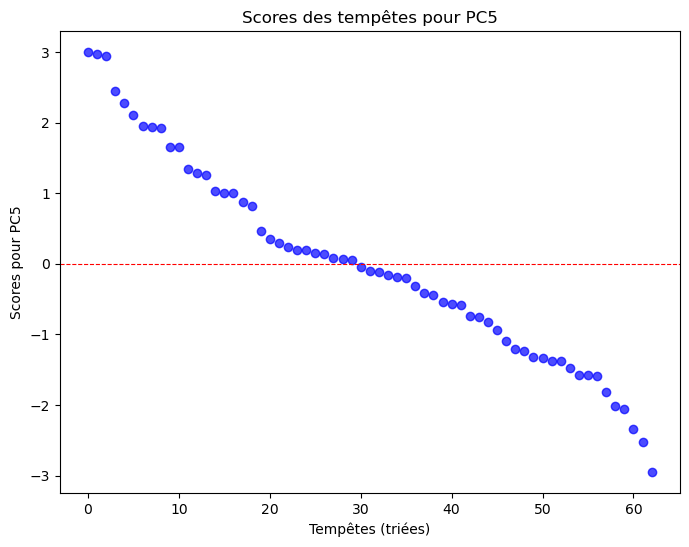

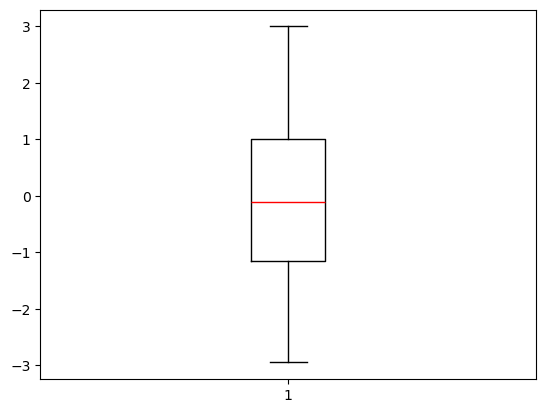

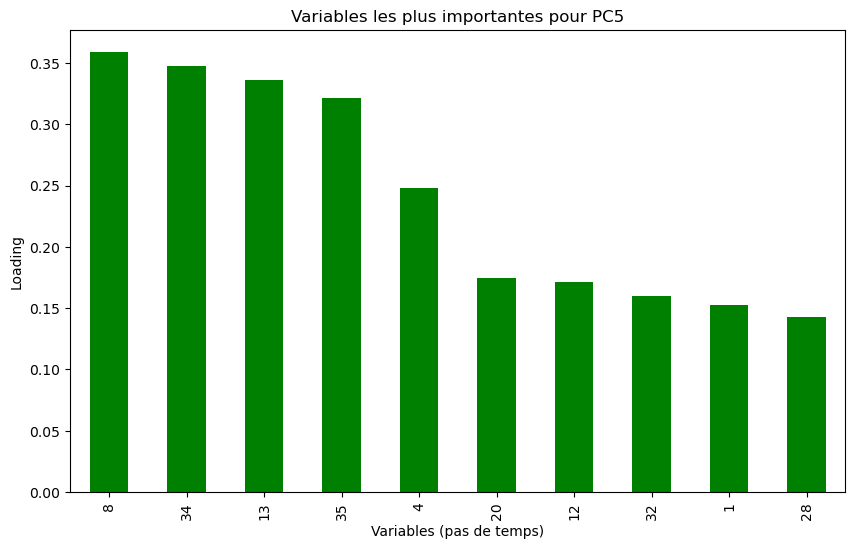

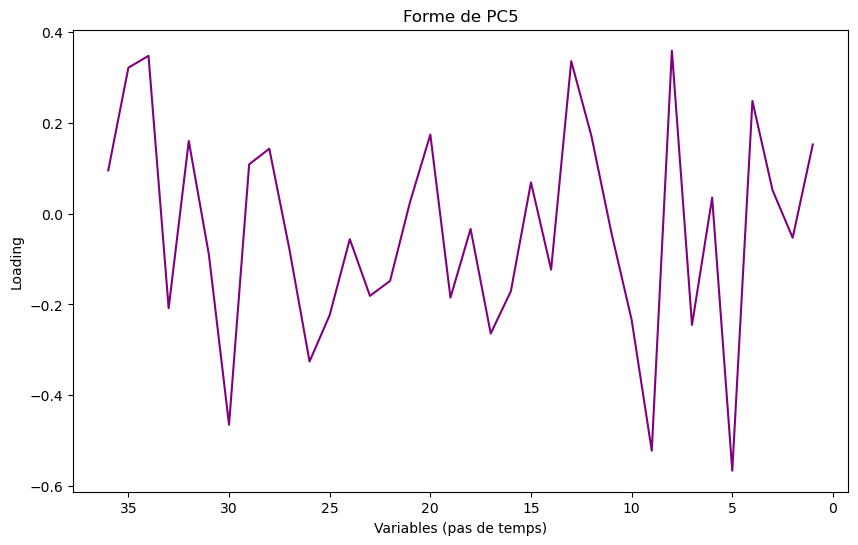

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Simulation des données
np.random.seed(42)  # Reproductibilité
n_storms = 63  # Nombre de tempêtes
n_timesteps = 36  # Nombre de pas de temps (variables)

# Génération aléatoire des données (par exemple, températures à différents moments)
data = np.random.rand(n_storms, n_timesteps) * 10  # Températures fictives entre 0 et 10

# Création d'un DataFrame pour plus de clarté
storm_names = [f'Tempête_{i+1}' for i in range(n_storms)]
time_steps = [f'Température_t{i+1}' for i in range(n_timesteps)]
data_df = pd.DataFrame(data, index=storm_names, columns=time_steps)

# Normalisation des données (centrage et réduction)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Application de l'ACP
n_components = 10  # On réduit à 10 composantes principales
pca = PCA(n_components=n_components)
pca.fit(data_scaled)

# Projection des tempêtes
scores = pca.transform(data_scaled)[:, :10]

# Création d'un DataFrame pour les scores
scores_df = pd.DataFrame(scores, 
                         columns=[f'PC{i+1}' for i in range(10)],
                         index=storm_names)

# Calcul des loadings
explained_variance = np.sqrt(pca.explained_variance_[:10])
loadings = pca.components_[:10, :].T * explained_variance

# Création d'un DataFrame pour les loadings
loadings_df = pd.DataFrame(loadings, 
                           columns=[f'PC{i+1}' for i in range(10)],
                           index=range(1, 36+1))

# Identification des tempêtes les plus alignées avec une composante principale donnée (ex. PC1)
pc_of_interest = 'PC5'

# Trier les scores par la composante PC1
sorted_scores = scores_df.sort_values(by=pc_of_interest, ascending=False)

print(f"Les tempêtes les plus alignées avec {pc_of_interest} :")
print(sorted_scores[[pc_of_interest]].head())  # Les 5 plus fortes contributions
print("\nLes tempêtes les plus opposées à {pc_of_interest} :")
print(sorted_scores[[pc_of_interest]].tail())  # Les 5 plus faibles contributions

# Identification des variables (pas de temps) les plus importantes pour PC1
loadings_sorted = loadings_df[pc_of_interest].sort_values(ascending=False)

print(f"Les variables les plus importantes pour {pc_of_interest} :")
print(loadings_sorted.head())  # Variables avec les plus grandes contributions
print("\nLes variables les moins importantes pour {pc_of_interest} :")
print(loadings_sorted.tail())  # Variables avec les plus faibles contributions

import matplotlib.pyplot as plt

# Distribution des scores pour une composante donnée
plt.figure(figsize=(8, 6))
plt.scatter(range(len(scores_df)), sorted_scores[pc_of_interest], color='blue', alpha=0.7)
plt.title(f"Scores des tempêtes pour {pc_of_interest}")
plt.xlabel("Tempêtes (triées)")
plt.ylabel(f"Scores pour {pc_of_interest}")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.show()

plt.boxplot(sorted_scores[pc_of_interest], medianprops = dict(color='red'))

# Diagramme en bâtons pour les variables les plus importantes
plt.figure(figsize=(10, 6))
loadings_sorted.head(10).plot(kind='bar', color='green')
plt.title(f"Variables les plus importantes pour {pc_of_interest}")
plt.xlabel("Variables (pas de temps)")
plt.ylabel("Loading")
plt.show()

# Forme de la PC of interest
plt.figure(figsize=(10, 6))
plt.plot(loadings_df[pc_of_interest], color='purple')
plt.title(f"Forme de {pc_of_interest}")
plt.xlabel("Variables (pas de temps)")
plt.ylabel("Loading")
# inverser l'axe des x
plt.gca().invert_xaxis()
plt.show()
